<a href="https://colab.research.google.com/github/yuliyahilevich/Data/blob/main/Sagaci_Research_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define  the Problem

With provided data we want you to deliver some insights:

* What is the market share of Maggi brand in the Bouillon category?
* What is the total volume of Mayonnaise sold in each outlet type in the Dakar region (Location 1)?
* What is the market share of each brand in each of the categories?
* How many stores were visited in Saint-Louis (Location 1)?
* What is the share of Stock of each SKU format for the Mustard category?


In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Taking in consideration that we have large df,making sure that we can see its entire length and width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Loading Data to the session storage
df = pd.read_excel('/content/datasetfeb2022.xlsx')
df.head(5)

,OUTLET_ID,OUTLET_TYPE,OUTLET_LOCATION_0,OUTLET_LOCATION_1,OUTLET_LOCATION_2,OUTLET_LOCATION_3,OUTLET_LOCATION_4,SKU_ID,SKU_BRAND,SKU_CATEGORY,SKU_CATEGORY_CUSTOM,SKU_FLAVOUR,SKU_FORMAT,SKU_VOLUME,SKU_UNIT_ID,SKU_UNIT,SKU_UNIT_TYPE,SKU_VOLUME_METRIC,SKU_MANUFACTURER,AUDIT_SKU_STOCK,AUDIT_SKU_FACINGS,AUDIT_PRICE,AUDIT_SALES,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1036802,Grocery Store,Senegal,Saint-Louis,Saint-Louis,Rao,Gandon,2000,ADJA,Bouillon,Bouillon,Tomato,Sachet,75.0,6244.0,g,Weight,0.075,Patisen,32.0,10.0,100.0,738.461538,0.000028,NaN,NaN,NaN
1,1036802,Grocery Store,Senegal,Saint-Louis,Saint-Louis,Rao,Gandon,7095,Reine,Mustard,Mustard,NaN,Glass Bottle,370.0,6244.0,g,Weight,0.370,NaN,18.0,4.0,500.0,2000.000000,0.000077,NaN,NaN,NaN
2,1037187,Grocery Store,Senegal,Ziguinchor,Ziguinchor,Niaguis,Niaguis,1931,Maynès,Mayonnaise,Mayonnaise,NaN,Plastic Bottle,5.0,6246.0,l,Volume,5.000,Patisen,1.0,1.0,5250.0,1000.000000,0.000038,NaN,NaN,NaN
3,1037189,Grocery Store,Senegal,Diourbel,Mbacké,Ndame,Touba Mosquee,7111,Joker,Bouillon,Bouillon,Spices,Sachet,15.0,6244.0,g,Weight,0.015,Patisen,15.0,15.0,25.0,566.037736,0.000022,NaN,NaN,NaN
4,1037189,Grocery Store,Senegal,Diourbel,Mbacké,Ndame,Touba Mosquee,7091,Joker,Bouillon,Bouillon,Tomato,Sachet,75.0,6244.0,g,Weight,0.075,Patisen,3.0,3.0,100.0,113.207547,0.000004,NaN,NaN,NaN


In [ ]:
#Just before any further analysis, checking the presence of missing values in the entire dataset
df.isnull().sum()

OUTLET_ID                  0
OUTLET_TYPE                0
OUTLET_LOCATION_0          0
OUTLET_LOCATION_1          0
OUTLET_LOCATION_2          0
OUTLET_LOCATION_3          0
OUTLET_LOCATION_4          0
SKU_ID                     0
SKU_BRAND                154
SKU_CATEGORY               0
SKU_CATEGORY_CUSTOM        0
SKU_FLAVOUR             5004
SKU_FORMAT               154
SKU_VOLUME               154
SKU_UNIT_ID              154
SKU_UNIT                 154
SKU_UNIT_TYPE            154
SKU_VOLUME_METRIC        154
SKU_MANUFACTURER        2563
AUDIT_SKU_STOCK           10
AUDIT_SKU_FACINGS         18
AUDIT_PRICE               12
AUDIT_SALES              489
Unnamed: 23              490
Unnamed: 24            14094
Unnamed: 25            14092
Unnamed: 26            14093
dtype: int64

In [ ]:
#Lets check the presence of duplicates 
df.duplicated().sum()

0

The dataset contains some missing values and fortunately no duplicates. At this stage, I've decided don't do anything but wait until the analysis of each question. 

# The answers

## 1.What is the market share of Maggi brand in the Bouillon Category






In [ ]:
df_maggie=df.copy()

In [ ]:
#Before our analysis let's have a look if our subset of data we require for analysis has missing values in one or other combinations
df_maggie = df[['SKU_BRAND','SKU_CATEGORY','AUDIT_SALES']]
df_missing_maggi = df_maggie[(df_maggie["SKU_CATEGORY"]=='Bouillon')]["SKU_BRAND"].isnull().sum()
print("There are {} missing brands in Bouillon category".format(df_missing_maggi))

There are 0 missing brands in Bouillon category


In [ ]:
df_missing_maggi = df_maggie[(df_maggie['SKU_BRAND']=='Maggie')]["SKU_CATEGORY"].isnull().sum()
print("There are {} missing categories for Maggie brand".format(df_missing_maggi))

There are 0 missing categories for Maggie brand


In [ ]:
df_missing_maggi = df_maggie[(df_maggie["SKU_CATEGORY"]=='Bouillon')&(df_maggie['SKU_BRAND']=='Maggie')]["AUDIT_SALES"].isnull().sum()
print("There are {} records with missing sales for Maggie brand in Bouillon category".format(df_missing_maggi))

There are 0 records with missing sales for Maggie brand in Bouillon category


Luckily there are no missing values we have to deal with on our subset of data

In [ ]:
#Let create a subset of data with condition == Bouillon and group it by Audit_sales in order to find the share within the category
df_maggie_share = df_maggie[df_maggie['SKU_CATEGORY']=='Bouillon']
df_maggie_share_agg = df_maggie_share.groupby(['SKU_CATEGORY','SKU_BRAND']).agg({'AUDIT_SALES': 'sum'}).assign(Share_within_category=lambda x: 100* x / x.sum())#.style.format({0: '{:.2%}'}
df_maggie_share_agg.style.format("{:.2f}")

In [ ]:
#Preparing the data for visualisation
pie_chart_maggie = df_maggie_share_agg.copy()
pie_chart_maggie = pie_chart_maggie.reset_index().sort_values("Share_within_category", ascending=False)
maggie_share_unswear=pie_chart_maggie[pie_chart_maggie["SKU_BRAND"]=='Maggi']["Share_within_category"].values.item()
print("Share of Maggie within Bouillon category is {}%".format(np.round(maggie_share_unswear,2)))

Share of Maggie within Bouillon category is 33.73%


In [ ]:
fig = px.pie(pie_chart_maggie, values = 'Share_within_category', names= 'SKU_BRAND', hole=.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Market share of Brands in the Bouillon Category')
fig.show(renderer='colab')

## 2.What is the total volume of Mayonnaise sold in each outlet type in the Dakar region (Location 1)?

In [ ]:
df_Mayonnaise = df.copy() 

In [ ]:
#Let check for the missing values in different combinations of data
df_Mayonnaise_null = df_Mayonnaise[(df_Mayonnaise['OUTLET_LOCATION_1']=='Dakar')]['SKU_CATEGORY'].isnull().sum()
print("There are {} records with missing values in category for Dakar region".format(df_Mayonnaise_null))

There are 0 records with missing values in category for Dakar region


In [ ]:
df_Mayonnaise_null = df_Mayonnaise[(df_Mayonnaise['SKU_CATEGORY']=='Mayonnaise')]['OUTLET_LOCATION_1'].isnull().sum()
print("There are {} records with missing values for Mayonnaise category in location_1 column".format(df_Mayonnaise_null))

There are 0 records with missing values for Mayonnaise category in location_1 column


There are no missing categories for Dakar region or missing regions for Mayonnaise categories. As we have 0 missing values, we can proceed with analysis

In [ ]:
# Let's reduce df to dakar and mayonnaise as those are our key features
df_Mayonnaise_Dakar=df_Mayonnaise[(df_Mayonnaise['OUTLET_LOCATION_1']=='Dakar')&(df_Mayonnaise['SKU_CATEGORY']=='Mayonnaise')]
print("Total number of records for Mayonnaise sold in Dakar is {}".format(df_Mayonnaise_Dakar.shape[0]))

Total number of records for Mayonnaise sold in Dakar is 539


To calculate volume of mayonnause sold we will use the following formula:
AUDIT_SALES/AUDIT_PRICE*SKU_VOLUME_METRIC

In [ ]:
# Let's check for missing data in our reduced df
df_Mayonnaise_Dakar.isnull().sum()

OUTLET_ID                0
OUTLET_TYPE              0
OUTLET_LOCATION_0        0
OUTLET_LOCATION_1        0
OUTLET_LOCATION_2        0
OUTLET_LOCATION_3        0
OUTLET_LOCATION_4        0
SKU_ID                   0
SKU_BRAND               84
SKU_CATEGORY             0
SKU_CATEGORY_CUSTOM      0
SKU_FLAVOUR            539
SKU_FORMAT              84
SKU_VOLUME              84
SKU_UNIT_ID             84
SKU_UNIT                84
SKU_UNIT_TYPE           84
SKU_VOLUME_METRIC       84
SKU_MANUFACTURER       187
AUDIT_SKU_STOCK          0
AUDIT_SKU_FACINGS        0
AUDIT_PRICE              0
AUDIT_SALES            104
Unnamed: 23            104
Unnamed: 24            539
Unnamed: 25            539
Unnamed: 26            539
dtype: int64

In [ ]:
# Let check for missing data only for the rows where AUDIT_SALES is not missing
df_Mayonnaise_Dakar[~df_Mayonnaise_Dakar["AUDIT_SALES"].isnull()].isnull().sum()

OUTLET_ID                0
OUTLET_TYPE              0
OUTLET_LOCATION_0        0
OUTLET_LOCATION_1        0
OUTLET_LOCATION_2        0
OUTLET_LOCATION_3        0
OUTLET_LOCATION_4        0
SKU_ID                   0
SKU_BRAND                0
SKU_CATEGORY             0
SKU_CATEGORY_CUSTOM      0
SKU_FLAVOUR            435
SKU_FORMAT               0
SKU_VOLUME               0
SKU_UNIT_ID              0
SKU_UNIT                 0
SKU_UNIT_TYPE            0
SKU_VOLUME_METRIC        0
SKU_MANUFACTURER        97
AUDIT_SKU_STOCK          0
AUDIT_SKU_FACINGS        0
AUDIT_PRICE              0
AUDIT_SALES              0
Unnamed: 23              0
Unnamed: 24            435
Unnamed: 25            435
Unnamed: 26            435
dtype: int64

In [ ]:
print("There are {} reconds with missing AUDIT_SALES out of  {}, or {}%".format(df_Mayonnaise_Dakar['AUDIT_SALES'].isnull().sum(), df_Mayonnaise_Dakar.shape[0],np.round(df_Mayonnaise_Dakar['AUDIT_SALES'].isnull().sum()/df_Mayonnaise_Dakar.shape[0]*100,2)))

There are 104 reconds with missing AUDIT_SALES out of  539, or 19.29%


Right now we have a problem with missing values in AUDIT SALES

In [ ]:
#Checking that everytying in the same unit type
df_Mayonnaise_Dakar[~df_Mayonnaise_Dakar["AUDIT_SALES"].isnull()]["SKU_UNIT_TYPE"].unique()

array(['Volume', 'Weight'], dtype=object)

In [ ]:
df_Mayonnaise_Dakar[~df_Mayonnaise_Dakar["AUDIT_SALES"].isnull()]["SKU_UNIT_TYPE"].value_counts()

Volume    409
Weight     26
Name: SKU_UNIT_TYPE, dtype: int64

In [ ]:
df_Mayonnaise_Dakar_notna=df_Mayonnaise_Dakar[~df_Mayonnaise_Dakar["AUDIT_SALES"].isnull()]
df_Mayonnaise_Dakar_notna[df_Mayonnaise_Dakar_notna["SKU_UNIT_TYPE"]=='Weight'].head(5)

,OUTLET_ID,OUTLET_TYPE,OUTLET_LOCATION_0,OUTLET_LOCATION_1,OUTLET_LOCATION_2,OUTLET_LOCATION_3,OUTLET_LOCATION_4,SKU_ID,SKU_BRAND,SKU_CATEGORY,SKU_CATEGORY_CUSTOM,SKU_FLAVOUR,SKU_FORMAT,SKU_VOLUME,SKU_UNIT_ID,SKU_UNIT,SKU_UNIT_TYPE,SKU_VOLUME_METRIC,SKU_MANUFACTURER,AUDIT_SKU_STOCK,AUDIT_SKU_FACINGS,AUDIT_PRICE,AUDIT_SALES,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
1960,1072221,Supermarket,Senegal,Dakar,Dakar,Parcelles Assainies,Parcelles Assainies,23059,Amora,Mayonnaise,Mayonnaise,NaN,Plastic Bottle,398.0,6244.0,g,Weight,0.398,Unilever,6.0,1.0,2750.0,2142.857143,0.000095,NaN,NaN,NaN
2733,1154725,Minimart,Senegal,Dakar,Dakar,Almadies,Mermoz/ Sacre -Coeur,7494,Amora,Mayonnaise,Mayonnaise,NaN,Glass Bottle,235.0,6244.0,g,Weight,0.235,Unilever,20.0,1.0,1000.0,4000.000000,0.000189,NaN,NaN,NaN
2930,1155400,Supermarket,Senegal,Dakar,Dakar,Grand Dakar,Sicap Liberte,24659,Ducros,Mayonnaise,Mayonnaise,NaN,Glass Bottle,470.0,6244.0,g,Weight,0.470,NaN,50.0,8.0,1750.0,7352.941176,0.000355,NaN,NaN,NaN
4736,1155400,Supermarket,Senegal,Dakar,Dakar,Grand Dakar,Sicap Liberte,4163,Leiseur,Mayonnaise,Mayonnaise,NaN,Glass Bottle,710.0,6244.0,g,Weight,0.710,NaN,50.0,4.0,2200.0,20000.000000,0.001156,NaN,NaN,NaN
4948,1155292,Supermarket,Senegal,Dakar,Dakar,Almadies,Mermoz/ Sacre -Coeur,4163,Leiseur,Mayonnaise,Mayonnaise,NaN,Glass Bottle,710.0,6244.0,g,Weight,0.710,NaN,10.0,1.0,2290.0,3949.957411,0.000234,NaN,NaN,NaN


According https://www.howmany.wiki to "0.972 gram of mayonnaise equals 1 milliliter." However, we need to note that this is an approximation.

In [ ]:
#Let's convert weight to volume
df_Mayonnaise_Dakar["UNI_VOLUME"]=df_Mayonnaise_Dakar["SKU_VOLUME_METRIC"]
df_Mayonnaise_Dakar.loc[(df_Mayonnaise_Dakar["SKU_UNIT_TYPE"]=='Weight'), "UNI_VOLUME"]=df_Mayonnaise_Dakar.loc[(df_Mayonnaise_Dakar["SKU_UNIT_TYPE"]=='Weight'), "UNI_VOLUME"]/0.972

In [ ]:
#In order to find out the amount sold we need to devide AUDIT_SALE/AUDIT_PRICE 
df_Mayonnaise_Dakar['AMOUNT_SOLD'] = df_Mayonnaise_Dakar['AUDIT_SALES']/df_Mayonnaise_Dakar['AUDIT_PRICE']
#Then in order to find volume sold we need to multiply the sold amount by its volume
df_Mayonnaise_Dakar['VOLUME_SOLD'] = df_Mayonnaise_Dakar['AMOUNT_SOLD']*df_Mayonnaise_Dakar['UNI_VOLUME']
df_Mayonnaise_Dakar.head(5)

,OUTLET_ID,OUTLET_TYPE,OUTLET_LOCATION_0,OUTLET_LOCATION_1,OUTLET_LOCATION_2,OUTLET_LOCATION_3,OUTLET_LOCATION_4,SKU_ID,SKU_BRAND,SKU_CATEGORY,SKU_CATEGORY_CUSTOM,SKU_FLAVOUR,SKU_FORMAT,SKU_VOLUME,SKU_UNIT_ID,SKU_UNIT,SKU_UNIT_TYPE,SKU_VOLUME_METRIC,SKU_MANUFACTURER,AUDIT_SKU_STOCK,AUDIT_SKU_FACINGS,AUDIT_PRICE,AUDIT_SALES,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,UNI_VOLUME,AMOUNT_SOLD,VOLUME_SOLD
21,1035793,Grocery Store,Senegal,Dakar,Rufisque,Bambilor,Yene,22601,NaN,Mayonnaise,Mayonnaise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1035884,Grocery Store,Senegal,Dakar,Dakar,Grand Dakar,Grand Dakar,1931,Maynès,Mayonnaise,Mayonnaise,NaN,Plastic Bottle,5.0,6246.0,l,Volume,5.000,Patisen,1.0,1.0,6500.0,1000.0,0.000039,NaN,NaN,NaN,5.000,0.153846,0.769231
62,1035885,Grocery Store,Senegal,Dakar,Guédiawaye,Guediawaye,Wakhinane Nimzatt,2002,BAMA,Mayonnaise,Mayonnaise,NaN,Glass Bottle,473.0,6245.0,ml,Volume,0.473,GBFoods,3.0,3.0,1200.0,1000.0,0.000039,NaN,NaN,NaN,0.473,0.833333,0.394167
110,1035841,Grocery Store,Senegal,Dakar,Dakar,Grand Dakar,Biscuiterie,1954,Maynès,Mayonnaise,Mayonnaise,NaN,Plastic Bottle,237.0,6245.0,ml,Volume,0.237,Patisen,20.0,1.0,500.0,2000.0,0.000078,NaN,NaN,NaN,0.237,4.000000,0.948000
113,1039434,Grocery Store,Senegal,Dakar,Dakar,Parcelles Assainies,Parcelles Assainies,2002,BAMA,Mayonnaise,Mayonnaise,NaN,Glass Bottle,473.0,6245.0,ml,Volume,0.473,GBFoods,10.0,6.0,1200.0,1000.0,0.000039,NaN,NaN,NaN,0.473,0.833333,0.394167


Now we have the Volume_sold, but we can observe that we don't have 'int' format, aka full value, but it's a 'float'. Does it mean that products have been sold at a discount, or partially not by unit? As of right now, we cant have the unswear I'm just going to carry on with the analysis

Now we need to deal with missing data. Dropping/replacing with 0 is not a very good option here as then we will certainly underestimate the volume of mayonnaise sold (if there is a record in the database then at least some amound was sold). Therefore we will use mean values to fill the gaps. 

In [ ]:
df_Mayonnaise_Dakar[df_Mayonnaise_Dakar['SKU_VOLUME_METRIC'].isnull()]
df_Mayonnaise_Dakar['VOLUME_SOLD'].isnull().sum()


104

In [ ]:
df_Mayonnaise_Dakar_filled=df_Mayonnaise_Dakar.copy()
df_Mayonnaise_Dakar_filled['VOLUME_SOLD'].fillna(value=df_Mayonnaise_Dakar_filled['VOLUME_SOLD'].mean(), inplace=True)
df_Mayonnaise_Dakar_filled['VOLUME_SOLD'].isnull().sum()
#df_Mayonnaise_Dakar_filled['VOLUME_SOLD'].isnull().sum()

0

In [ ]:
#Lets group by our data by OUTLET_TYPE
#TODO: round 
df_Mayonnaise_Dakar_final=df_Mayonnaise_Dakar_filled.groupby(['OUTLET_TYPE']).agg({'VOLUME_SOLD': 'sum'}).sort_values("VOLUME_SOLD", ascending=False)
df_Mayonnaise_Dakar_final.style.format("{:.2f}")

,VOLUME_SOLD
OUTLET_TYPE,
Grocery Store,456.70
Supermarket,178.97
Greengrocer,141.04
Minimart,109.38
Kiosk,58.74
Table top,6.82


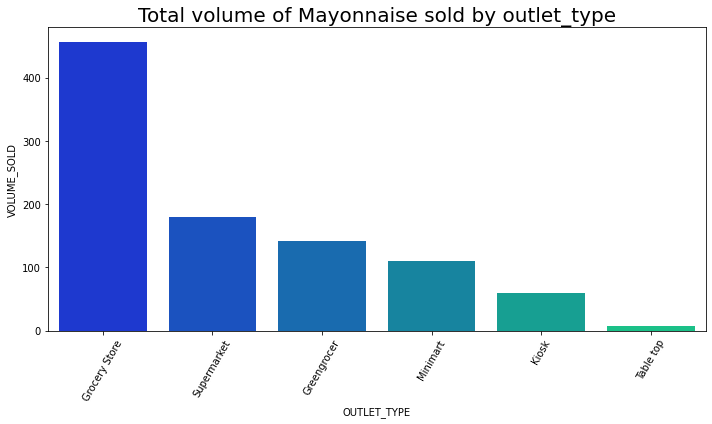

In [ ]:
bar_chart = df_Mayonnaise_Dakar_final.reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(bar_chart['OUTLET_TYPE'],
            bar_chart['VOLUME_SOLD'],palette= 'winter')
plt.title('Total volume of Mayonnaise sold by outlet_type', fontsize = 20)
plt.xticks(rotation=60)
plt.tight_layout()

# 3.What is the market share of each brand in each of the categories?

In [ ]:
df_brand_share = df.copy()
#df_brand_share = df[['SKU_CATEGORY','SKU_BRAND','AUDIT_SALES']]

In [ ]:
#Let check for the missing values in different combinations of data
df_null_brand= df_brand_share[~df_brand_share['SKU_BRAND'].isnull()]['SKU_CATEGORY'].isnull().sum()
print("There are {} records with brands where categories are missing".format(df_null_brand))

There are 0 records with brands where categories are missing


In [ ]:
df_null_brand= df_brand_share[~df_brand_share['SKU_CATEGORY'].isnull()]['SKU_BRAND'].isnull().sum()
print("There are {} records with categories where brands are missing".format(df_null_brand))

There are 154 records with categories where brands are missing


In [ ]:
brand_share_nonull_full = df_brand_share[df_brand_share[('SKU_BRAND')].notna()]
brand_share_nonull_full.isnull().sum()

OUTLET_ID                  0
OUTLET_TYPE                0
OUTLET_LOCATION_0          0
OUTLET_LOCATION_1          0
OUTLET_LOCATION_2          0
OUTLET_LOCATION_3          0
OUTLET_LOCATION_4          0
SKU_ID                     0
SKU_BRAND                  0
SKU_CATEGORY               0
SKU_CATEGORY_CUSTOM        0
SKU_FLAVOUR             4850
SKU_FORMAT                 0
SKU_VOLUME                 0
SKU_UNIT_ID                0
SKU_UNIT                   0
SKU_UNIT_TYPE              0
SKU_VOLUME_METRIC          0
SKU_MANUFACTURER        2409
AUDIT_SKU_STOCK           10
AUDIT_SKU_FACINGS         18
AUDIT_PRICE               12
AUDIT_SALES              335
Unnamed: 23              336
Unnamed: 24            13940
Unnamed: 25            13938
Unnamed: 26            13939
dtype: int64

In [ ]:
brand_share_nonull_full= brand_share_nonull_full['AUDIT_SALES'].isnull().sum()
print("There are {} missing brands with missing sales".format(brand_share_nonull_full))

There are 335 missing brands with missing sales


In [ ]:
df_brand_share.shape

(14094, 27)

In [ ]:
print("There are {} reconds with missing AUDIT_SALES out of  {}, or {}%".format(df_brand_share['AUDIT_SALES'].isnull().sum(), df_brand_share.shape[0],np.round(df_brand_share['AUDIT_SALES'].isnull().sum()/df_brand_share.shape[0]*100,2)))

There are 489 reconds with missing AUDIT_SALES out of  14094, or 3.47%


Taking into consideration that we are missing just 3,5% of data in Audit_sale column, i've decided to drop it

In [ ]:
brand_share_nonull_full = df_brand_share[df_brand_share[('AUDIT_SALES')].notna()]
brand_share_nonull_full.isnull().sum()

OUTLET_ID                  0
OUTLET_TYPE                0
OUTLET_LOCATION_0          0
OUTLET_LOCATION_1          0
OUTLET_LOCATION_2          0
OUTLET_LOCATION_3          0
OUTLET_LOCATION_4          0
SKU_ID                     0
SKU_BRAND                  0
SKU_CATEGORY               0
SKU_CATEGORY_CUSTOM        0
SKU_FLAVOUR             4670
SKU_FORMAT                 0
SKU_VOLUME                 0
SKU_UNIT_ID                0
SKU_UNIT                   0
SKU_UNIT_TYPE              0
SKU_VOLUME_METRIC          0
SKU_MANUFACTURER        2321
AUDIT_SKU_STOCK            0
AUDIT_SKU_FACINGS         11
AUDIT_PRICE                3
AUDIT_SALES                0
Unnamed: 23                1
Unnamed: 24            13605
Unnamed: 25            13603
Unnamed: 26            13604
dtype: int64

In [ ]:
#Lets use groupby() method to see the share of each brand in each category.Groupby(level=0)helping us to see the share of the brand on category level
brand_share_nonull_full = brand_share_nonull_full.groupby(['SKU_CATEGORY','SKU_BRAND']).agg({'AUDIT_SALES': 'sum'})
brand_share_nonull_full["Market share %"] = brand_share_nonull_full.groupby(level=0).apply( lambda x:  round(100*x / x.sum(), 2))
brand_share_nonull_full.style.format("{:.2f}")

In [ ]:
df_treemap = brand_share_nonull_full.reset_index()
fig = px.treemap(df_treemap, path=['SKU_CATEGORY','SKU_BRAND'],values='Market share %')
#fig.update_layout(title_text'Market share of each Brand in each Category')
fig.show(renderer="colab")

# 4.How many stores were visited in Saint-Louis (Location 1)?

In [ ]:
# Are there any missing locations in the data? 
df['OUTLET_LOCATION_1'].isnull().sum()

0

In [ ]:
#Subset just for Saint-Louis location
df_visited_stores =df[(df['OUTLET_LOCATION_1'] == 'Saint-Louis')]

In [ ]:
#Before our analysis lets have a look if our subset has missing values
df_visited_stores_null= df_visited_stores['OUTLET_ID'].isnull().sum()
print("There are {} missing values in outlet_id in Saint-Louis".format(df_visited_stores_null))

There are 0 missing values in outlet_id in Saint-Louis


In [ ]:
#Lets creat condition == Saint-Louis and count unique values in Outlet_Id
df_visited_saint= df_visited_stores['OUTLET_ID'].unique().shape[0]
print("There are {} visited stores in Saint-Louis".format(df_visited_saint))

There are 157 visited stores in Saint-Louis


In [ ]:
df_saint = df_visited_stores.groupby(['OUTLET_LOCATION_1']).agg(Number_of_Times=('OUTLET_ID','nunique'))
df_saint

,Number_of_Times
OUTLET_LOCATION_1,
Saint-Louis,157


# 5.What is the share of Stock of each SKU format for the Mustard category?

In [ ]:
# Are there any missing categories? 
df['SKU_CATEGORY'].isnull().sum()

0

In [ ]:
# Create subset for mustard
df_mustard=df[df['SKU_CATEGORY']=="Mustard"].copy()
df_mustard.head(5)

,OUTLET_ID,OUTLET_TYPE,OUTLET_LOCATION_0,OUTLET_LOCATION_1,OUTLET_LOCATION_2,OUTLET_LOCATION_3,OUTLET_LOCATION_4,SKU_ID,SKU_BRAND,SKU_CATEGORY,SKU_CATEGORY_CUSTOM,SKU_FLAVOUR,SKU_FORMAT,SKU_VOLUME,SKU_UNIT_ID,SKU_UNIT,SKU_UNIT_TYPE,SKU_VOLUME_METRIC,SKU_MANUFACTURER,AUDIT_SKU_STOCK,AUDIT_SKU_FACINGS,AUDIT_PRICE,AUDIT_SALES,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
1,1036802,Grocery Store,Senegal,Saint-Louis,Saint-Louis,Rao,Gandon,7095,Reine,Mustard,Mustard,NaN,Glass Bottle,370.0,6244.0,g,Weight,0.37,NaN,18.0,4.0,500.0,2000.000000,0.000077,NaN,NaN,NaN
8,1036852,Grocery Store,Senegal,Diourbel,Mbacké,Ndame,Touba Mosquee,7468,PAK,Mustard,Mustard,NaN,Glass Bottle,850.0,6244.0,g,Weight,0.85,NaN,4.0,4.0,1500.0,250.000000,0.000010,NaN,NaN,NaN
16,1036899,Grocery Store,Senegal,Saint-Louis,Saint-Louis,Rao,Gandon,7089,Reine,Mustard,Mustard,NaN,Glass Bottle,850.0,6244.0,g,Weight,0.85,NaN,20.0,12.0,1200.0,1666.666667,0.000064,NaN,NaN,NaN
25,1035795,Grocery Store,Senegal,Dakar,Pikine,Niayes,Keur Massar,6919,Reine,Mustard,Mustard,NaN,Plastic Bottle,5.0,6497.0,kg,Weight,5.00,NaN,2.0,1.0,4000.0,642.857143,0.000025,NaN,NaN,NaN
28,1035795,Grocery Store,Senegal,Dakar,Pikine,Niayes,Keur Massar,7095,Reine,Mustard,Mustard,NaN,Glass Bottle,370.0,6244.0,g,Weight,0.37,NaN,12.0,4.0,500.0,3857.142857,0.000149,NaN,NaN,NaN


In [ ]:
# Let's check for missing data: 
df_mustard[['SKU_FORMAT', 'AUDIT_SKU_STOCK']].isnull().sum()


SKU_FORMAT         0
AUDIT_SKU_STOCK    0
dtype: int64

There is no missing data.

In [ ]:
df_mustard_grouped = df_mustard.groupby(['SKU_FORMAT']).agg({'AUDIT_SKU_STOCK' : 'sum'}) #.assign(Share=lambda x: 100* x / x.sum())
df_mustard_grouped

,AUDIT_SKU_STOCK
SKU_FORMAT,
Glass Bottle,10157.0
Plastic Bottle,5482.0
Sachet,950.0


In [ ]:
df_mustard_final = df_mustard_grouped.apply(lambda x: x / float(x.sum()))
df_mustard_final.style.format("{:.2%}")

,AUDIT_SKU_STOCK
SKU_FORMAT,
Glass Bottle,61.23%
Plastic Bottle,33.05%
Sachet,5.73%


In [ ]:
pie_chart_stock = df_mustard_final.reset_index().sort_values('AUDIT_SKU_STOCK', ascending=False)
fig = px.pie(pie_chart_stock, values = 'AUDIT_SKU_STOCK', names= 'SKU_FORMAT', hole=.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Share of SKU_Format in Mustard category')
fig.show(renderer="colab")